<a href="https://colab.research.google.com/github/eduardofarina/COVID-19-Lung-Radiography-CNN-Kaggle-Dataset/blob/master/COVID_CT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install -q kaggle

In [2]:
!pip install pydicom

     |████████████████████████████████| 35.5MB 88kB/s 


In [3]:
# Imports

import numpy as np
import pandas as pd
import os
import random 
from shutil import copyfile
import pydicom as dicom
import cv2
import matplotlib.pyplot as plt
from matplotlib.image import imread

from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import backend as K 
K.set_image_data_format('channels_last')

In [6]:
kjson = pd.read_json('kaggle (1).json',typ='series')

In [7]:
# enter your Kaggle credentionals here

os.environ['KAGGLE_USERNAME']= "eduardofarina"
os.environ['KAGGLE_KEY']= kjson.key

In [8]:
!kaggle datasets download -d luisblanche/covidct

 94% 81.0M/85.8M [00:05<00:00, 11.3MB/s]
100% 85.8M/85.8M [00:05<00:00, 17.9MB/s]


In [34]:
!kaggle datasets download -d plameneduardo/sarscov2-ctscan-dataset

 94% 217M/230M [00:08<00:00, 25.5MB/s]
100% 230M/230M [00:08<00:00, 29.5MB/s]


In [35]:
!unzip sarscov2-ctscan-dataset.zip

Archive:  sarscov2-ctscan-dataset.zip
  inflating: COVID/Covid (1).png     
  inflating: COVID/Covid (10).png    
  inflating: COVID/Covid (100).png   
  inflating: COVID/Covid (1000).png  
  inflating: COVID/Covid (1001).png  
  inflating: COVID/Covid (1002).png  
  inflating: COVID/Covid (1003).png  
  inflating: COVID/Covid (1004).png  
  inflating: COVID/Covid (1005).png  
  inflating: COVID/Covid (1006).png  
  inflating: COVID/Covid (1007).png  
  inflating: COVID/Covid (1008).png  
  inflating: COVID/Covid (1009).png  
  inflating: COVID/Covid (101).png   
  inflating: COVID/Covid (1010).png  
  inflating: COVID/Covid (1011).png  
  inflating: COVID/Covid (1012).png  
  inflating: COVID/Covid (1013).png  
  inflating: COVID/Covid (1014).png  
  inflating: COVID/Covid (1015).png  
  inflating: COVID/Covid (1016).png  
  inflating: COVID/Covid (1017).png  
  inflating: COVID/Covid (1018).png  
  inflating: COVID/Covid (1019).png  
  inflating: COVID/Covid (102).png   
  inflating:

In [10]:
!unzip covidct.zip

Archive:  covidct.zip
  inflating: COVID-CT-MetaInfo.xlsx  
  inflating: CT_COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%0.png  
  inflating: CT_COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-89%1.png  
  inflating: CT_COVID/2019-novel-Coronavirus-severe-adult-respiratory-dist_2020_International-Jour-p3-91.png  
  inflating: CT_COVID/2020.01.24.919183-p27-132.png  
  inflating: CT_COVID/2020.01.24.919183-p27-133.png  
  inflating: CT_COVID/2020.01.24.919183-p27-134.png  
  inflating: CT_COVID/2020.01.24.919183-p27-135.png  
  inflating: CT_COVID/2020.02.10.20021584-p6-52%0.png  
  inflating: CT_COVID/2020.02.10.20021584-p6-52%1.png  
  inflating: CT_COVID/2020.02.10.20021584-p6-52%10.png  
  inflating: CT_COVID/2020.02.10.20021584-p6-52%11.png  
  inflating: CT_COVID/2020.02.10.20021584-p6-52%12.png  
  inflating: CT_COVID/2020.02.10.20021584-p6-52%13.png  
  inflating: CT_COVID/2020.02.10.20021584-p6-52

In [11]:

os.listdir('CT_COVID/')

['2020.03.22.20034041-p18-92-3.png',
 '2020.02.17.20024018-p17-61%3.png',
 '2020.03.22.20040782-p25-1542.png',
 '2020.02.28.20029025-p23-182.png',
 '2020.03.12.20034686-p17-91-6.png',
 '2020.02.22.20024927-p20-70%0.png',
 '2020.03.25.20043166-p17-79.png',
 'Talaromyces-marneffei-infection-relapse-presenting-as-ost_2020_International-p1-12%2.png',
 '2020.02.23.20026856-p17-115%0.png',
 '2020.03.26.20041426-p11-120.png',
 '2020.02.17.20024018-p17-61%1.png',
 '2020.03.19.20038539-p10-60.png',
 '2020.03.11.20033159-p12-45%2.png',
 '2020.02.23.20026856-p17-115%2.png',
 '2020.03.10.20032136-p34-118_1%0.png',
 '2020.02.11.20021493-p16-109%1.png',
 '2020.02.26.20027938-p6-80_1%0.png',
 '2020.03.26.20041426-p11-123.png',
 '2020.03.22.20040782-p25-1541.png',
 'Comparison-of-different-samples-for-2019-novel-cor_2020_International-Journa-p2-21%11.png',
 '2020.02.22.20024927-p20-70%2.png',
 '2020.03.18.20038125-p16-56-2.png',
 'PIIS0140673620303603%7.png',
 '2020.02.25.20021568-p23-108%14.png',
 'k

In [12]:
covid_image_list = os.listdir('CT_COVID/')
normal_image_list = os.listdir('CT_NonCOVID/')

In [36]:
paths = []
y = []

for dirname, _, filenames in os.walk('CT_COVID/'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            paths.append(os.path.join(dirname, filename))
            y.append(0)
            
for dirname, _, filenames in os.walk('CT_NonCOVID/'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            paths.append(os.path.join(dirname, filename))
            y.append(1)
for dirname, _, filenames in os.walk('COVID/'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            paths.append(os.path.join(dirname, filename))
            y.append(0)
            
for dirname, _, filenames in os.walk('non-COVID/'):
    for filename in filenames:
        if (filename[-3:] == 'png'):
            paths.append(os.path.join(dirname, filename))
            y.append(1)
for dirname, _, filenames in os.walk('COVID/'):
    for filename in filenames:
        if (filename[-3:] == 'jpg'):
            paths.append(os.path.join(dirname, filename))
            y.append(0)
            
for dirname, _, filenames in os.walk('non-COVID/'):
    for filename in filenames:
        if (filename[-3:] == 'jpg'):
            paths.append(os.path.join(dirname, filename))
            y.append(1)

In [37]:
len(y)

3025

In [38]:
X = []
for i in paths:
    image = cv2.imread(i)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (128, 128))

    X.append(image)

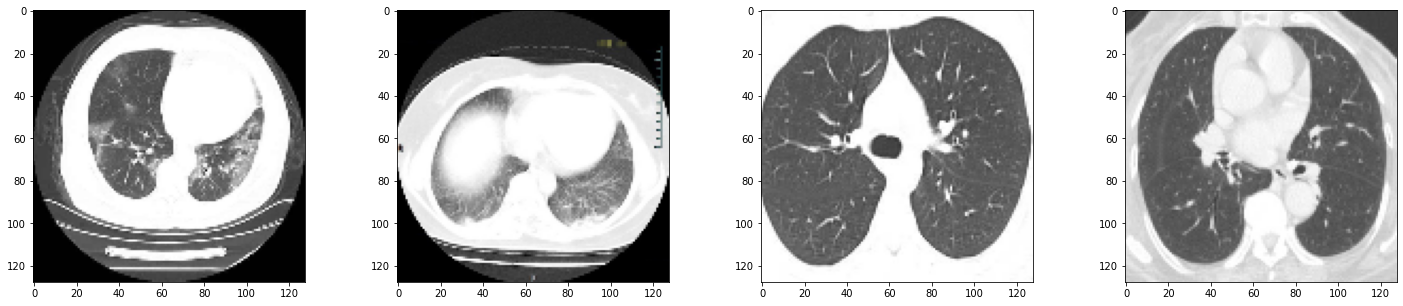

In [39]:
fig, (ax1, ax2,ax3,ax4) = plt.subplots(ncols = 4,nrows = 1, figsize = (25,5))
ax1.imshow(X[100],cmap='gray')
ax2.imshow(X[0],cmap='gray')
ax3.imshow(X[2000],cmap='gray')
ax4.imshow(X[-1],cmap='gray')



plt.show()

In [40]:
X = np.array(X)/255
y = np.array(y)

In [41]:
X.shape

(3025, 128, 128, 3)

In [42]:
Xtrain, Xval, ytrain, yval  = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [43]:
Xtrain.shape

(2026, 128, 128, 3)

In [44]:
Xval, Xtest, yval, ytest  = train_test_split(Xval, yval, test_size = 0.5, random_state = 42)

In [45]:
modelo_base = InceptionV3(weights='imagenet', include_top= False, input_shape=(128,128,3))

In [46]:
add_model = Sequential()

# Adiciona primeiro o modelo base
add_model.add(modelo_base)

# Precisamos de uma camada global de Pooling
add_model.add(GlobalAveragePooling2D())

# Dropout para regularização e evitar overfitting
add_model.add(Dropout(0.5))

# Camada densa na camada final com ativação softmax para previsão das probabilidades das classes
add_model.add(Dense(2, activation = 'softmax'))

In [47]:

add_model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'])

In [48]:
# Regra para a redução da taxa de aprendizado
reduce_lr = ReduceLROnPlateau(monitor = 'val_accuracy', patience = 3, verbose = 1, factor = 0.5, min_lr = 0.00001)

In [49]:
image_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               zoom_range=0.05, # Zoom in by 5% max
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
)
image_gen.fit(Xtrain)

In [50]:
ycat_val = to_categorical(yval,2)
ycat_train = to_categorical(ytrain,2)

In [51]:
results = add_model.fit_generator(image_gen.flow(Xtrain, ycat_train), epochs=100,validation_data=(Xval,ycat_val), callbacks = [reduce_lr])

Epoch 1/100
64/64 [==============================] - 11s 171ms/step - loss: 0.6423 - accuracy: 0.7275 - val_loss: 19.7926 - val_accuracy: 0.5010 - lr: 0.0010
Epoch 2/100
64/64 [==============================] - 9s 142ms/step - loss: 0.4792 - accuracy: 0.8381 - val_loss: 52382.4727 - val_accuracy: 0.5812 - lr: 0.0010
Epoch 3/100
64/64 [==============================] - 9s 141ms/step - loss: 0.4262 - accuracy: 0.8455 - val_loss: 2.5204 - val_accuracy: 0.5752 - lr: 0.0010
Epoch 4/100
64/64 [==============================] - 9s 142ms/step - loss: 0.4252 - accuracy: 0.8376 - val_loss: 29.4006 - val_accuracy: 0.5331 - lr: 0.0010
Epoch 5/100
64/64 [==============================] - 9s 142ms/step - loss: 0.4296 - accuracy: 0.8346 - val_loss: 1.7787 - val_accuracy: 0.7435 - lr: 0.0010
Epoch 6/100
64/64 [==============================] - 9s 142ms/step - loss: 0.5263 - accuracy: 0.8070 - val_loss: 1.1616 - val_accuracy: 0.5691 - lr: 0.0010
Epoch 7/100
64/64 [==============================] - 9s 1

In [52]:
losses = pd.DataFrame(add_model.history.history)

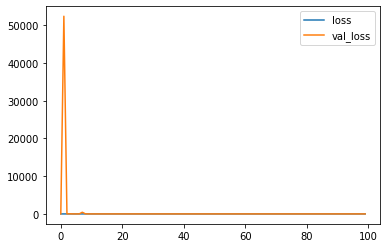

In [53]:
losses[['loss','val_loss']].plot()
plt.show()

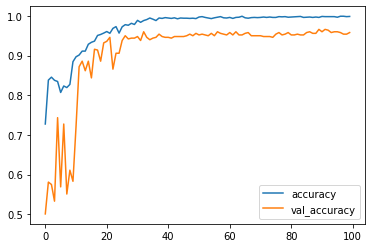

In [54]:
losses[['accuracy','val_accuracy']].plot()
plt.show()

In [56]:
pred = add_model.predict_classes(Xtest)

In [57]:
from sklearn.metrics import classification_report
print(classification_report(ytest, pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96       265
           1       0.95      0.97      0.96       235

    accuracy                           0.96       500
   macro avg       0.96      0.96      0.96       500
weighted avg       0.96      0.96      0.96       500



In [59]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest, pred)

array([[253,  12],
       [  8, 227]])